## 그리드 서치 (Grid Search)
- 머신러닝 모델의 하이퍼파라미터 튜닝을 위한 방법
- 모델 학습시 사전에 정의된 하이퍼파라미터 조합을 하나식 대입해보면서 최적의 조합을 찾아내는 과정
- 조합이 다양해질수록 최적의 조합을 찾을 확률이 높아지지만 그만큼 리소스도 많이 사용된다.
- 그리드 서치, 랜덤 서치 방법이 있다.

![](https://velog.velcdn.com/images/newnew_daddy/post/b1ed6d60-a137-43fc-a244-8aa8ea8e53de/image.png)

#### Grid Search vs Random Search
- Grid Search : 정해진 하이퍼파라미터 조합을 순서대로 대입하여 모델의 성능을 평가
- Random Search : 하이퍼파라미터의 랜던 조합을 대입하여 모델의 성능을 평가
![](https://velog.velcdn.com/images/newnew_daddy/post/74188c81-ec8c-4b12-8c5b-81a200a5d794/image.png)


#### Cross Validation의 활용

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

dataset = load_diabetes()

X = dataset.data
y = dataset.target

X.shape, y.shape

((442, 10), (442,))

In [87]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [88]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [119]:
model = SVR(C=1)

model.fit(X_train,y_train)
model.score(X_test, y_test)

0.1611853727721696

In [90]:
## cross val score
from sklearn.model_selection import cross_val_score

## model 1
model = SVR(kernel='linear', C=10, gamma='auto')
score = cross_val_score(model, X, y, cv=5)
print(score, np.average(score))

## model 2
model = SVR(kernel='rbf', C=10, gamma='auto')

score = cross_val_score(model, X, y, cv=5)
print(score, np.average(score))

## model 3
model = SVR(kernel='rbf', C=100, gamma='auto')

score = cross_val_score(model, X, y, cv=5)
print(score, np.average(score))

[0.14141134 0.09697283 0.17049838 0.13059794 0.13307644] 0.13451138710237948
[ 0.01894899 -0.03454687  0.03059343 -0.00663813  0.01061595] 0.0037946725584064424
[0.22468629 0.22433077 0.29228823 0.26137151 0.24807806] 0.2501509728589747


In [91]:
kernels = ['linear', 'poly', 'rbf']
C = [0.1, 1, 10, 50, 100]

for kernel in kernels:
    for c in C:
        model = SVR(kernel=kernel, C=c, gamma='auto')
        score = cross_val_score(model, X, y, cv=5)
        print(f"{kernel, c} | Score -> {np.average(score)}")

('linear', 0.1) | Score -> -0.04224334126633482
('linear', 1) | Score -> -0.01998345627927085
('linear', 10) | Score -> 0.13451138710237948
('linear', 50) | Score -> 0.3909976987953244
('linear', 100) | Score -> 0.4475456436081261
('poly', 0.1) | Score -> -0.04459987847421867
('poly', 1) | Score -> -0.044599870052145496
('poly', 10) | Score -> -0.04459978583142612
('poly', 50) | Score -> -0.04459941151735185
('poly', 100) | Score -> -0.04459894362529369
('rbf', 0.1) | Score -> -0.04413071559206139
('rbf', 1) | Score -> -0.03979398598001378
('rbf', 10) | Score -> 0.0037946725584064424
('rbf', 50) | Score -> 0.1336847185233972
('rbf', 100) | Score -> 0.2501509728589747


#### Grid Search 적용

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'

dataset = load_diabetes()

X = dataset.data
y = dataset.target

X.shape, y.shape

((442, 10), (442,))

In [93]:
# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [94]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [95]:
model = SVR(C=1)

In [96]:
# # Lasso Regression 모델 학습
# lasso = Lasso(alpha=0.01, max_iter=1000)

# lasso.get_params()

In [97]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

<Axes: >

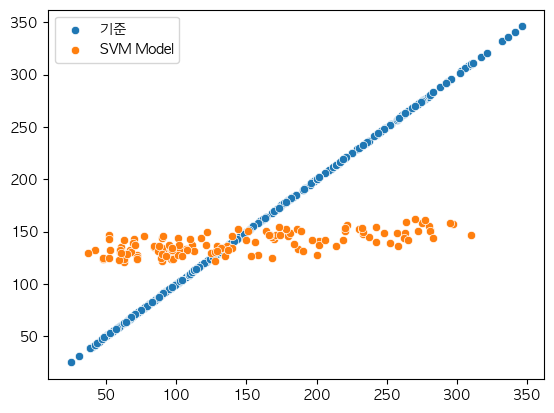

In [98]:
sns.scatterplot(x = y_train, y = y_train, label="기준")
sns.scatterplot(x = y_test, y = y_pred, label='SVM Model')

In [99]:
print(model.score(X_test, y_test))

0.1611853727721696


In [100]:
# from sklearn.tree import DecisionTreeRegressor
    
# lasso = DecisionTreeRegressor(random_state = 0)

# lasso.get_params()

In [101]:
# param_grid = {
#     'max_depth': [1,2,3,4,5,6,7,8]
# }
# param_grid = {
#     'alpha': [0.01, 0.1, 1, 10, 100],
#     'max_iter': [100, 500, 1000, 5000, 10000],
#     # 'selection': ['cyclic', 'random']
#     'tol': np.logspace(-3,3,7)
# }
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : np.arange(1, 6),
    'C': np.logspace(-3,3,7)
}

In [102]:
from sklearn.model_selection import GridSearchCV

# Grid Search 설정
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    )

# Grid Search 수행
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(C=1),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='r2')

In [103]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10.0, 'degree': 1, 'kernel': 'sigmoid'}
0.4751963680368442


In [104]:
df = pd.DataFrame(grid_search.cv_results_)

# df.sort_values(by='mean_test_score', ascending=False)

In [105]:
## 최고 성능 모델 선택

best_model = grid_search.best_estimator_

print(best_model.score(X_test, y_test))

0.4730468024651314


In [106]:
y_pred_cv = best_model.predict(X_test)

<Axes: >

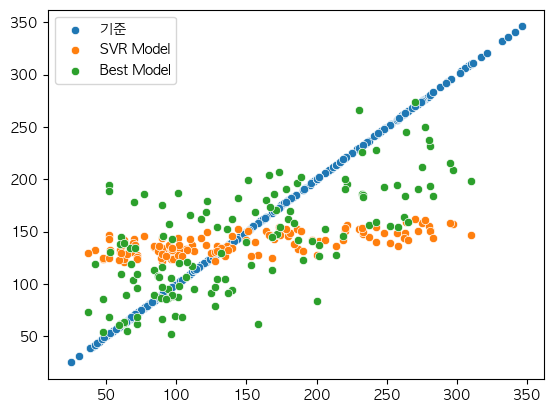

In [107]:
sns.scatterplot(x = y_train, y = y_train, label="기준")
sns.scatterplot(x = y_test, y = y_pred, label='SVR Model')
sns.scatterplot(x = y_test, y = y_pred_cv, label = "Best Model")

In [108]:
print(best_model.score(X_train, y_train))
print(best_model.score(X_test, y_test))

0.49421682040147663
0.4730468024651314


In [109]:
## Score 비교

print(model.score(X_test, y_test))
print(best_model.score(X_test, y_test))

0.1611853727721696
0.4730468024651314


#### Random Search 적용

In [110]:
model = SVR(C=1)

In [111]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : np.arange(1, 6),
    'C': np.logspace(-3,3,7)
}

In [112]:
from sklearn.model_selection import RandomizedSearchCV

# Grid Search 설정
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    verbose=2,
    random_state=42,
    n_jobs=-1
    )

# Grid Search 수행
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...................C=100.0, degree=3, kernel=linear; total time=   0.0s
[CV] END ...................C=100.0, degree=3, kernel=linear; total time=   0.0s
[CV] END ...................C=100.0, degree=3, kernel=linear; total time=   0.0s
[CV] END ...................C=100.0, degree=3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.0, degree=2, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100.0, degree=3, kernel=linear; total time=   0.0s
[CV] END ....................C=1.0, degree=2, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1.0, degree=2, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1.0, degree=2, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, degree=3, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1.0, degree=2, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.01, degree=3, ke

/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hyunsoo/Desktop/Lecture/lecture/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 376, in _score
    return self._sign * self._score_func(y_true, 

RandomizedSearchCV(cv=5, estimator=SVR(C=1), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [113]:
print(random_search.best_params_)
# print(random_search.cv_results_)
print(random_search.best_estimator_)

{'kernel': 'linear', 'degree': 3, 'C': 100.0}
SVR(C=100.0, kernel='linear')


In [114]:
best_model_rand = random_search.best_estimator_

print(best_model_rand.score(X_test, y_test))

0.45120683964014385


In [115]:
y_pred_rand = random_search.predict(X_test)

<Axes: >

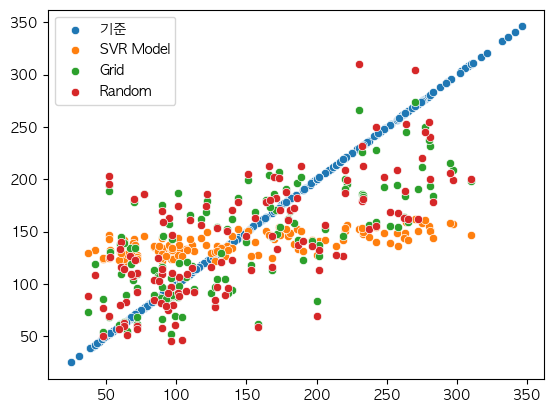

In [116]:
sns.scatterplot(x = y_train, y = y_train, label="기준")
sns.scatterplot(x = y_test, y = y_pred, label='SVR Model')
sns.scatterplot(x = y_test, y = y_pred_cv, label = "Grid")
sns.scatterplot(x = y_test, y = y_pred_rand, label = "Random")

In [117]:
print(best_model_rand.score(X_train, y_train))
print(best_model_rand.score(X_test, y_test))

0.5155031108422476
0.45120683964014385


In [120]:
## Score 비교

print(model.score(X_test, y_test))

print(best_model.score(X_test, y_test))

print(best_model_rand.score(X_test, y_test))

0.1611853727721696
0.4730468024651314
0.45120683964014385
